In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from PIL import Image
import pandas as pd
import cv2
import random
import numpy as np
%matplotlib inline

### stage2


In [10]:
df = pd.read_csv('../data/stage2/train.csv')

In [11]:
df.head()

,ImageId,EncodedPixels
0,1.2.276.0.7230010.3.1.4.8323329.6904.151787520...,-1
1,1.2.276.0.7230010.3.1.4.8323329.13666.15178752...,557374 2 1015 8 1009 14 1002 20 997 26 990 32 ...
2,1.2.276.0.7230010.3.1.4.8323329.11028.15178752...,-1
3,1.2.276.0.7230010.3.1.4.8323329.10366.15178752...,514175 10 1008 29 994 30 993 32 991 33 990 34 ...
4,1.2.276.0.7230010.3.1.4.8323329.10016.15178752...,592184 33 976 58 956 73 941 88 926 102 917 109...


In [14]:
df['has_mask'] = df.apply(lambda x: 0 if x[1] == '-1' else 1, axis=1)

In [15]:
df.head()

,ImageId,EncodedPixels,has_mask
0,1.2.276.0.7230010.3.1.4.8323329.6904.151787520...,-1,0
1,1.2.276.0.7230010.3.1.4.8323329.13666.15178752...,557374 2 1015 8 1009 14 1002 20 997 26 990 32 ...,1
2,1.2.276.0.7230010.3.1.4.8323329.11028.15178752...,-1,0
3,1.2.276.0.7230010.3.1.4.8323329.10366.15178752...,514175 10 1008 29 994 30 993 32 991 33 990 34 ...,1
4,1.2.276.0.7230010.3.1.4.8323329.10016.15178752...,592184 33 976 58 956 73 941 88 926 102 917 109...,1


In [16]:
# df.to_csv('../data/stage2/train.csv', index=False)

### ChexPert

In [4]:
train = pd.read_csv('../data/chexpert/CheXpert-v1.0-small/train.csv')
valid = pd.read_csv('../data/chexpert/CheXpert-v1.0-small/valid.csv')

In [5]:
train.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [6]:
train['Pneumothorax'].value_counts()

 0.0    56341
 1.0    19448
-1.0     3145
Name: Pneumothorax, dtype: int64

In [7]:
valid.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
valid['Pneumothorax'].value_counts()

0.0    226
1.0      8
Name: Pneumothorax, dtype: int64

In [11]:
path

'../data/chexpert/CheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg'

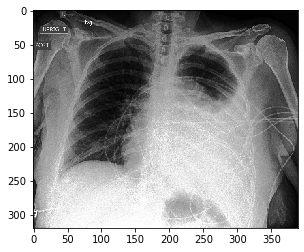

In [36]:
i = random.choice(range(len(train)))
path = '../data/chexpert/' + train['Path'][i]
img = cv2.imread(path)
plt.imshow(img);

In [23]:
img.shape

(320, 390, 3)

#### 256 sized image and masks

In [21]:
!ls ../data

npy_masks_1024	   npy_train_512			       test_dicoms
npy_masks_256	   npy_train_512.zip			       test_png
npy_masks_512	   org_data				       train.csv
npy_masks_512.zip  sample_submission.csv		       train_dicoms
npy_train_1024	   siimacr-pneumothorax-segmentation-data-128  train_png
npy_train_256	   siimacr-pneumothorax-segmentation-data-256  train-rle.csv


In [96]:
train_df = pd.read_csv('../data/train-rle.csv')
train_df.shape
#test_df = pd.read_csv('../data/siimacr-pneumothorax-segmentation-data-256/train/')

(11582, 2)

In [97]:
train_df.head()

,ImageId,EncodedPixels
0,1.2.276.0.7230010.3.1.4.8323329.5597.151787518...,-1
1,1.2.276.0.7230010.3.1.4.8323329.12515.15178752...,-1
2,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,175349 7 1013 12 1009 17 1005 19 1003 20 1002...
3,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,407576 2 1021 7 1015 10 1013 12 1011 14 1008 ...
4,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,252069 1 1021 3 1020 4 1018 5 1018 6 1016 7 1...


In [98]:
# add new columm
train_df['EncodedPixels'] = train_df['EncodedPixels'].str.strip()
train_df['has_mask'] = train_df['EncodedPixels'].apply(lambda x: x != '-1')
train_df['has_mask'] = train_df['has_mask'].astype('int')
# train_df.to_csv('../data/train.csv', index=False)

In [99]:
train_df.head()

,ImageId,EncodedPixels,has_mask
0,1.2.276.0.7230010.3.1.4.8323329.5597.151787518...,-1,0
1,1.2.276.0.7230010.3.1.4.8323329.12515.15178752...,-1,0
2,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,175349 7 1013 12 1009 17 1005 19 1003 20 1002 ...,1
3,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,407576 2 1021 7 1015 10 1013 12 1011 14 1008 1...,1
4,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,252069 1 1021 3 1020 4 1018 5 1018 6 1016 7 10...,1


In [19]:
train_df.drop_duplicates('ImageId')['has_mask'].value_counts()

0    8296
1    2379
Name: has_mask, dtype: int64

### Png images eda

In [37]:
!ls ../data/test_images_stage2/

ID_0011fe81e.dcm  ID_417de54fc.dcm  ID_7dd6c9d4c.dcm  ID_be42fa6c8.dcm
ID_003206608.dcm  ID_418dd78f9.dcm  ID_7e534f1f1.dcm  ID_be47c2a35.dcm
ID_004d6fbb6.dcm  ID_41ba53083.dcm  ID_7e773894d.dcm  ID_be5f554d1.dcm
ID_004d72c54.dcm  ID_41cd23d84.dcm  ID_7e87208de.dcm  ID_be6ea89fa.dcm
ID_00528aa0e.dcm  ID_420f00571.dcm  ID_7e8dc2073.dcm  ID_be84b20cb.dcm
ID_00593ac6d.dcm  ID_422f28eef.dcm  ID_7e9956ae5.dcm  ID_be9411eaa.dcm
ID_00b0e5a9f.dcm  ID_4240dfc4e.dcm  ID_7ea0c4a0e.dcm  ID_bea58ce7d.dcm
ID_00b115bfe.dcm  ID_424ce1ad1.dcm  ID_7ea5447f5.dcm  ID_beb77d896.dcm
ID_00d054471.dcm  ID_4277c6829.dcm  ID_7eb916342.dcm  ID_bf0650b32.dcm
ID_00f04769e.dcm  ID_427cf2bfb.dcm  ID_7ebcbca7d.dcm  ID_bf0c37dd8.dcm
ID_00f715288.dcm  ID_428b04d67.dcm  ID_7ed678e78.dcm  ID_bf11f5cc4.dcm
ID_010566ba9.dcm  ID_42a855846.dcm  ID_7ed740c24.dcm  ID_bf424e85b.dcm
ID_0159b1d59.dcm  ID_42b4053ad.dcm  ID_7ee962256.dcm  ID_bf534a6ee.dcm
ID_017bd788a.dcm  ID_42bc8d2d3.dcm  ID_7eea84450.dcm  ID_bf6030360.dcm
ID_018

In [2]:
import pydicom

In [3]:
test_images = glob.glob('../data/test_images_stage2/*')

In [4]:
test_images[0]

'../data/test_images_stage2/ID_12170ab8e.dcm'

In [5]:
dataset = pydicom.dcmread(test_images[0])

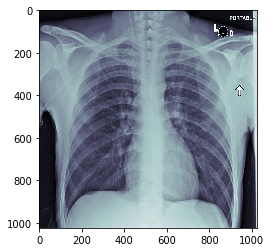

In [9]:
img = dataset.pixel_array.astype('float32')
plt.imshow(img / 255, cmap='bone')

In [7]:
img.shape, img.dtype

((1024, 1024), dtype('uint8'))

In [47]:
def show_dcm_info(dataset):
    print("Storage type.....:", dataset.SOPClassUID)
    print()

    pat_name = dataset.PatientName
    display_name = pat_name.family_name + ", " + pat_name.given_name
    print("Patient's name......:", display_name)
    print("Patient id..........:", dataset.PatientID)
    print("Patient's Age.......:", dataset.PatientAge)
    print("Patient's Sex.......:", dataset.PatientSex)
    print("Modality............:", dataset.Modality)
    print("Body Part Examined..:", dataset.BodyPartExamined)
    print("View Position.......:", dataset.ViewPosition)
    
    if 'PixelData' in dataset:
        rows = int(dataset.Rows)
        cols = int(dataset.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(dataset.PixelData)))
        if 'PixelSpacing' in dataset:
            print("Pixel spacing....:", dataset.PixelSpacing)

def plot_pixel_array(dataset, figsize=(10,10)):
    plt.figure(figsize=figsize)
    plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
    plt.show()

Storage type.....: 1.2.840.10008.5.1.4.1.1.7

Patient's name......: c4fe745c-7f20-4fec-9ad6-8ec2e0e3c3a5, 
Patient id..........: c4fe745c-7f20-4fec-9ad6-8ec2e0e3c3a5
Patient's Age.......: 53
Patient's Sex.......: M
Modality............: CR
Body Part Examined..: CHEST
View Position.......: PA
Image size.......: 1024 x 1024, 156408 bytes
Pixel spacing....: ['0.14300000000000002', '0.14300000000000002']


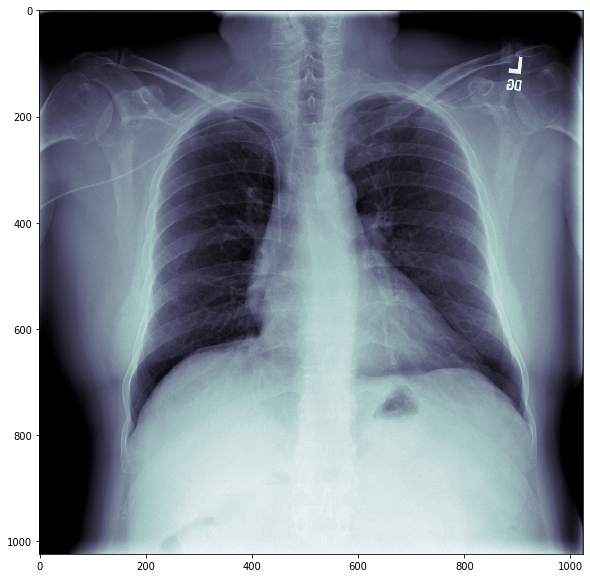

In [48]:
dataset = pydicom.dcmread(train_imgs[0])
show_dcm_info(dataset)
plot_pixel_array(dataset)

In [29]:
train_imgs = glob.glob('../data/train_png/*')

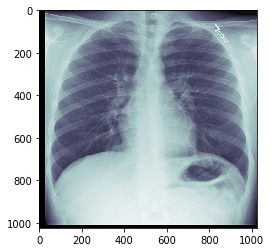

In [37]:
img = Image.open(train_imgs[0])
plt.imshow(img, cmap='bone')

Each image is 1024x

In [49]:
# lets see some npy files

In [50]:
train_imgs = glob.glob('../data/npy_files/npy_train_1024/*')

In [70]:
train_df.head()

,ImageId,EncodedPixels,has_mask
0,1.2.276.0.7230010.3.1.4.8323329.5597.151787518...,-1,0
1,1.2.276.0.7230010.3.1.4.8323329.12515.15178752...,-1,0
2,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,175349 7 1013 12 1009 17 1005 19 1003 20 1002...,1
3,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,407576 2 1021 7 1015 10 1013 12 1011 14 1008 ...,1
4,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,252069 1 1021 3 1020 4 1018 5 1018 6 1016 7 1...,1


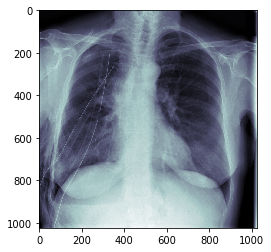

In [73]:
masked = train_df.query('has_mask==1')
image_id = masked.iloc[0]['ImageId']
img = np.load(f'../data/npy_files/npy_train_1024/{image_id}.npy')
mask = np.load(f'../data/npy_files/npy_masks_1024/{image_id}.npy')
plt.imshow(img[..., 0], cmap='bone')

In [74]:
np.unique(mask)

array([0., 1.], dtype=float32)

In [77]:
mask = mask.astype('uint8')

In [78]:
np.save('test.npy', mask)

In [79]:
! du -sh test.npy

1.1M	test.npy


In [81]:
f'../data/npy_files/npy_masks_1024/{image_id}.npy'

'../data/npy_files/npy_masks_1024/1.2.276.0.7230010.3.1.4.8323329.4904.1517875185.355709.npy'

In [82]:
!du -sh ../data/npy_files/npy_masks_1024/1.2.276.0.7230010.3.1.4.8323329.4904.1517875185.355709.npy

4.1M	../data/npy_files/npy_masks_1024/1.2.276.0.7230010.3.1.4.8323329.4904.1517875185.355709.npy


Conclusion: save masks in uint8 format

### NIH chest xrays

In [147]:
df = pd.read_csv('../data/nih_data/Data_Entry_2017.csv')

In [148]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [149]:
df.shape

(112120, 12)

In [150]:
labels = df['Finding Labels'].unique()

In [151]:
pneumo = [x for x in labels if 'Pneumothorax' in x]

In [152]:
df['has_mask'] = df.apply(lambda x: 1 if x[1] in pneumo else 0, axis=1 )

In [153]:
df['has_mask'].value_counts()

0    106818
1      5302
Name: has_mask, dtype: int64

In [155]:
df['ImageId'] = df.apply(lambda x: x[0].split('.')[0], axis=1 )

In [161]:
# nih_df = pd.DataFrame()
# nih_df['ImageId'] = df['ImageId']
# nih_df['has_mask'] = df['has_mask']
# nih_df.to_csv('../data/nih_data/train.csv', index=False)

In [162]:
df = pd.read_csv('../data/nih_data/train.csv')
df.head()

,ImageId,has_mask
0,00000001_000,0
1,00000001_001,0
2,00000001_002,0
3,00000002_000,0
4,00000003_000,0


In [163]:
df['has_mask'].value_counts()

0    106818
1      5302
Name: has_mask, dtype: int64

In [125]:
5302/106818 # Only 4 % positive images

0.0496358291673688

In [128]:
# df.query('"Image Index" == "00030162_026.png"')
df[df['Image Index'] == '00030162_026.png']

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,IsPneumo
110711,00030162_026.png,Infiltration|Nodule|Pneumothorax,26,30162,15,M,AP,3056,2544,0.139,0.139,NaN,1


Analysing by PatientId

In [129]:
patient_gb = df.groupby('Patient ID')

In [131]:
len(patient_gb.groups)

30805

In [134]:
pids = patient_gb.groups.keys()

In [143]:
patient_gb.get_group(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,IsPneumo
13,00000005_000.png,No Finding,0,5,69,F,PA,2048,2500,0.168,0.168,NaN,0
14,00000005_001.png,No Finding,1,5,69,F,AP,2500,2048,0.168,0.168,NaN,0
15,00000005_002.png,No Finding,2,5,69,F,AP,2500,2048,0.168,0.168,NaN,0
16,00000005_003.png,No Finding,3,5,69,F,PA,2992,2991,0.143,0.143,NaN,0
17,00000005_004.png,No Finding,4,5,70,F,PA,2986,2991,0.143,0.143,NaN,0
18,00000005_005.png,No Finding,5,5,70,F,PA,2514,2991,0.143,0.143,NaN,0
19,00000005_006.png,Infiltration,6,5,70,F,PA,2992,2991,0.143,0.143,NaN,0
20,00000005_007.png,Effusion|Infiltration,7,5,70,F,PA,2566,2681,0.143,0.143,NaN,0


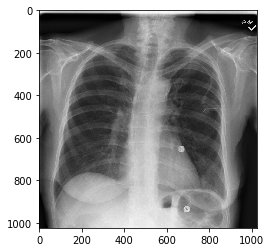

In [144]:
# plot an image
img = '00000005_007.png'
path = '../data/nih_data/images/' + img
img = cv2.imread(path)
plt.imshow(img)

In [132]:
kaggle_df = pd.read_csv('../data/train.csv')

In [133]:
kaggle_df.head()

,ImageId,EncodedPixels,has_mask
0,1.2.276.0.7230010.3.1.4.8323329.5597.151787518...,-1,0
1,1.2.276.0.7230010.3.1.4.8323329.12515.15178752...,-1,0
2,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,175349 7 1013 12 1009 17 1005 19 1003 20 1002 ...,1
3,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,407576 2 1021 7 1015 10 1013 12 1011 14 1008 1...,1
4,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,252069 1 1021 3 1020 4 1018 5 1018 6 1016 7 10...,1
